In [1]:
pip install pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# CASO 1: PREDICCION DE CALIFICACIONES FINALES (G3)

### PRUEBA 1 - SIN ONTOLOGIA (8 FEATURES EXTRAIDAS MANUALMENTE)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# ===============================
# 0. Cargar dataset
# ===============================
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# ===============================
# 1. Modelo Baseline (8 features conocidas)
# ===============================
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X = df[selected_features]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = RandomForestRegressor(random_state=42)
model_simple.fit(X_train, y_train)
y_pred = model_simple.predict(X_test)

mse_simple = mean_squared_error(y_test, y_pred)
r2_simple = r2_score(y_test, y_pred)

# ===============================
# 2. Modelo con Top 10 Features por correlación
# ===============================
correlations = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)
top_features = correlations.drop('G3').head(10).index.tolist()

X_top = df[top_features]
y_top = df['G3']

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)

mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

# ===============================
# 3. Resultados
# ===============================
results = {
    "Baseline MSE": mse_simple,
    "Baseline R2": r2_simple,
    "Top Correlated MSE": mse_top,
    "Top Correlated R2": r2_top
}

print(results)

{'Baseline MSE': 3.1980499018987345, 'Baseline R2': 0.8440359653850061, 'Top Correlated MSE': 2.92150253164557, 'Top Correlated R2': 0.8575227604475979}


### PRUEBA 2 - SIN ONTOLOGIA (CALCULO DE LAS 10 FEATURES MEJOR CORRELACIONADAS CON G3)

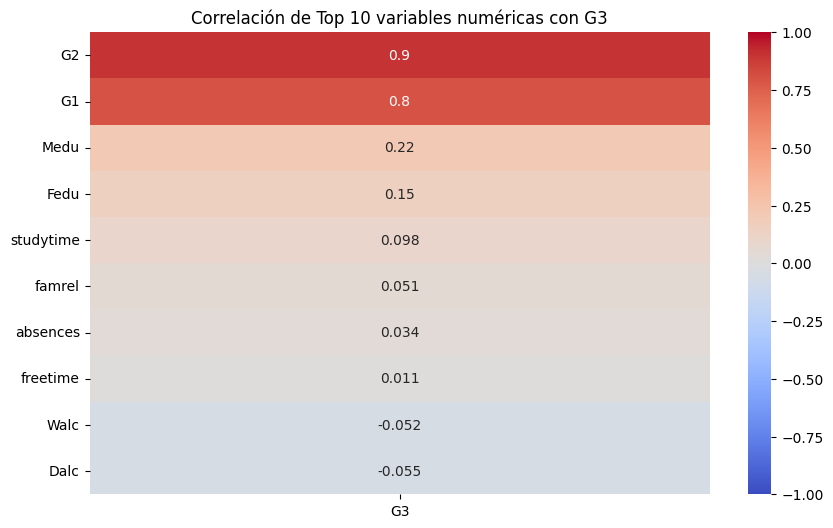

Resultados comparativos:
Baseline (8 features): MSE = 3.20, R² = 0.84
Top 10 Correlated: MSE = 2.92, R² = 0.86


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# 0. Cargar dataset
# ===============================
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# ===============================
# 1. Visualización de correlaciones
# ===============================
correlation_matrix = df.corr(numeric_only=True)
top_corr = correlation_matrix['G3'].drop('G3').sort_values(ascending=False)

'''
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix[['G3']].sort_values(by='G3', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación de variables numéricas con G3")
plt.show()
'''

# ===============================
# 2. Modelo Baseline (8 features conocidas)
# ===============================
baseline_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X_base = df[baseline_features]
y = df['G3']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.2, random_state=42)

model_base = RandomForestRegressor(random_state=42)
model_base.fit(X_train_base, y_train_base)
y_pred_base = model_base.predict(X_test_base)

mse_base = mean_squared_error(y_test_base, y_pred_base)
r2_base = r2_score(y_test_base, y_pred_base)

# ===============================
# 3. Modelo con Top 10 Features por correlación
# ===============================
top10_features = top_corr.head(10).index.tolist()
X_top = df[top10_features]

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)

mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

# grafico de correlaciones top 10
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix.loc[top10_features, ['G3']],
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title("Correlación de Top 10 variables numéricas con G3")
plt.show()

# ===============================
# 4. Resultados Comparativos
# ===============================
results = {
    "Baseline (8 features)": {"MSE": mse_base, "R2": r2_base},
    "Top 10 Correlated": {"MSE": mse_top, "R2": r2_top}
}

print("Resultados comparativos:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R2']:.2f}")


## INTEGRACION DE LA ONTOLOGIA 

### Visualizacion de las clases ontologicas

In [4]:
import rdflib

# Cargar la ontología TTL
g = rdflib.Graph()
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.ttl"
g.parse(ttl_path, format="turtle")

# Obtener clases y sus comentarios
classes = []
for s in g.subjects(rdflib.RDF.type, rdflib.OWL.Class):
    comment = g.value(subject=s, predicate=rdflib.RDFS.comment)
    if comment:
        classes.append((s.split("#")[-1], str(comment)))

# Mostrar resumen de clases presentes
pd.DataFrame(classes, columns=["Class", "Comment"])


,Class,Comment
0,Father,Specifically a father guardian.
1,Mother,Specifically a mother guardian.
2,OtherGuardian,Non-mother/father guardian.
3,ParentsOccupation,Educational and professional background of par...
4,Reason,"Reason for choosing the school: home, reputati..."
5,School,Represents a school (GP or MS).
6,HealthAndWellBeing,Student's physical/mental well-being and habits.
7,Infrastructure,Access to school and technological resources.
8,Job,"Possible job categories: teacher, health, serv..."
9,SocialBehaviour,Social and emotional student data.


In [6]:
# Uso de todas las features relevantes agrupadas por su clase ontológica
# Crear grupos de columnas por categoría basada en la ontología

grouped_features = {
    "AcademicPerformance": ['G1', 'G2', 'failures'],
    "StudyHabits": ['studytime', 'schoolsup', 'famsup', 'paid'],
    "HealthAndWellBeing": ['health', 'absences', 'Dalc', 'Walc'],
    "SocialBehaviour": ['goout', 'romantic', 'freetime'],
    "Infrastructure": ['internet', 'traveltime'],
    "Family": ['famsize', 'Pstatus'],
    "ParentsOccupation": ['Medu', 'Fedu', 'Mjob', 'Fjob'],
    "Demographics": ['age', 'sex', 'address', 'guardian'],
    "Target": ['G3']
}

# Unimos todas las columnas únicas para el modelo
columns_for_model = sum([v for k, v in grouped_features.items() if k != 'Target'], [])

# Cargar y preparar dataset
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# Subset con columnas seleccionadas
df_semantic = df[columns_for_model + grouped_features['Target']]

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df_semantic, drop_first=True)

# Dividir features y target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model_semantic = RandomForestRegressor(random_state=42)
model_semantic.fit(X_train, y_train)

# Predicción
y_pred_semantic = model_semantic.predict(X_test)

# Evaluación
mse_semantic = mean_squared_error(y_test, y_pred_semantic)
r2_semantic = r2_score(y_test, y_pred_semantic)

# Comparar con el baseline anterior
results.update({
    "Ontology-Based MSE": mse_semantic,
    "Ontology-Based R2": r2_semantic
})

results

{'Baseline (8 features)': {'MSE': 3.1980499018987345,
  'R2': 0.8440359653850061},
 'Top 10 Correlated': {'MSE': 2.92150253164557, 'R2': 0.8575227604475979},
 'Ontology-Based MSE': 3.446567088607594,
 'Ontology-Based R2': 0.831916159784953}

## Prueba de razonamiento automatico en la ontologia

In [ ]:
pip install owlready2

In [10]:
import rdflib

# Ruta del archivo TTL original
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.ttl"

# Cargar y convertir a RDF/XML (.owl)
g = rdflib.Graph()
g.parse(ttl_path, format="turtle")
owl_path = ttl_path.replace(".ttl", ".owl")
g.serialize(destination=owl_path, format="xml")
print(f"✔️ Ontología convertida y guardada en: {owl_path}")


✔️ Ontología convertida y guardada en: /Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.owl


In [11]:
from owlready2 import get_ontology, sync_reasoner_pellet
import pandas as pd

# Cargar la ontología .owl ya convertida
onto = get_ontology(f"file://{owl_path}").load()

# Ejecutar razonamiento lógico
with onto:
    sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True)

# Listar todas las instancias y sus clases inferidas
students = list(onto.individuals())
student_info = []

for ind in students:
    types = list(ind.is_a)
    student_info.append((ind.name, [t.name for t in types]))

pd.DataFrame(student_info, columns=["Instance", "Inferred Types"])


* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/httpclient-4.2.3.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/aterm-java-1.6.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-iri-0.9.5.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/Users/danie

,Instance,Inferred Types


### **_NOTA:_**

✎ Cabe recalcar que la tabla de Instance e Inferred Types esta vacia porque no se han creado instancias.

### Visualizacion de las relaciones entre entidades/clases ontologicas

In [12]:
import rdflib
import pandas as pd

# Cargar la ontología TTL
g = rdflib.Graph()
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.ttl"
g.parse(ttl_path, format="turtle")

# Función para obtener propiedades de dominio Student agrupadas por clases
def get_features_by_class(graph, domain_uri):
    feature_map = {}
    
    for s, p, o in graph.triples((None, rdflib.RDFS.domain, rdflib.URIRef(domain_uri))):
        # Identificar si es propiedad de datos o de objeto
        label = None
        if (s, rdflib.RDF.type, rdflib.OWL.DatatypeProperty) in graph:
            label = "DatatypeProperty"
        elif (s, rdflib.RDF.type, rdflib.OWL.ObjectProperty) in graph:
            label = "ObjectProperty"

        if label:
            # Obtener la clase de rango para agrupar
            range_class = graph.value(subject=s, predicate=rdflib.RDFS.range)
            if isinstance(range_class, rdflib.term.URIRef):
                group_name = range_class.split("#")[-1]
                prop_name = s.split("#")[-1]
                feature_map.setdefault(group_name, []).append(prop_name)

    return feature_map

# Extraer features por clase desde la ontología
grouped_features_ontology = get_features_by_class(g, "http://example.org/student-ontology#Student")

# Mostrar resultado
pd.DataFrame([(k, ", ".join(v)) for k, v in grouped_features_ontology.items()], columns=["Class", "Features"])


,Class,Features
0,Infrastructure,accesses
1,School,attendsSchool
2,Family,belongsTo
3,Job,"hasFatherJob, hasMotherJob"
4,Guardian,hasGuardian
5,HealthAndWellBeing,hasHealthProfile
6,AcademicPerformance,hasPerformance
7,Reason,hasReason
8,SocialBehaviour,hasSocialBehaviour
9,StudyHabits,hasStudyHabits


### Resultados finales del modelo de prediccion de notas finales (G3) con inferencia obtenida de la ontologia

In [17]:
# Cargar el dataset real
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# Mapeo manual entre propiedades ontológicas y columnas reales del dataset
# Este mapeo se basa en el conocimiento previo del dataset y cómo cada propiedad se refleja en él
mapping_manual = {
    "AcademicPerformance": ['G1', 'G2', 'failures'],
    "StudyHabits": ['studytime', 'schoolsup', 'famsup', 'paid'],
    "HealthAndWellBeing": ['health', 'absences', 'Dalc', 'Walc'],
    "SocialBehaviour": ['goout', 'romantic', 'freetime'],
    "Infrastructure": ['internet', 'traveltime'],
    "Family": ['famsize', 'Pstatus'],
    "ParentsOccupation": ['Medu', 'Fedu', 'Mjob', 'Fjob'],
    "Demographics": ['age', 'sex', 'address', 'guardian'],
    "Target": ['G3']
}

# Consolidar columnas finales a usar (sin repetir)
columns_for_model = sorted(set(sum([v for k, v in mapping_manual.items() if k != 'Target'], [])))
columns_for_model += mapping_manual['Target']  # agregar G3 para entrenar

# Subset del dataset y codificación
df_semantic = df[columns_for_model]
df_encoded = pd.get_dummies(df_semantic, drop_first=True)

# Separar features y target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# Entrenar modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
ontology_guided_results = pd.DataFrame([{
    "Ontology-Guided MSE": mse,
    "Ontology-Guided R2": r2,
    #"Num Features Used": X.shape[1]
}])

print("Ontology-Guided Model Results:")
print(ontology_guided_results)

Ontology-Guided Model Results:
   Ontology-Guided MSE  Ontology-Guided R2
0             3.540425            0.827339


# CASO 2: CLASIFICACION DE ESTUDIANTES POR SU DESEMPENO

## Modelos Base:

Reporte del modelo BASELINE (features manuales):
              precision    recall  f1-score   support

        alto       0.94      0.94      0.94        18
        bajo       0.94      0.94      0.94        47
       medio       0.88      0.88      0.88        34

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



<Figure size 600x600 with 0 Axes>

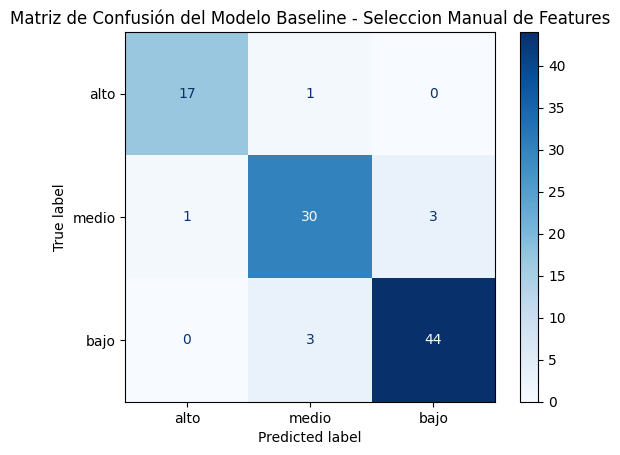

In [51]:
# MODELO 1 – Baseline: Clasificación por desempeño con features manuales

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Cargar dataset
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student-mat.csv", sep=";")
df.columns = df.columns.str.strip()

# Crear variable categórica de desempeño
def categorize_g3(score):
    if score <= 10:
        return 'bajo'
    elif score <= 14:
        return 'medio'
    else:
        return 'alto'

df["Desempeño"] = df["G3"].apply(categorize_g3)

# Selección manual de las 8 variables mas relevantes por critrerio de expertos
manual_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X = pd.get_dummies(df[manual_features], drop_first=True)
y = df['Desempeño']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Resultados
print("Reporte del modelo BASELINE (features manuales):")
print(classification_report(y_test, y_pred))

# GRAFICAR RESULTADOS--------------
cm = confusion_matrix(y_test, y_pred, labels=['alto', 'medio', 'bajo'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['alto', 'medio', 'bajo'])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión del Modelo Baseline - Seleccion Manual de Features")
plt.show()

Reporte del modelo con TOP 15 features más correlacionadas con G3:
              precision    recall  f1-score   support

        alto       1.00      0.94      0.97        18
        bajo       0.94      0.96      0.95        47
       medio       0.91      0.91      0.91        34

    accuracy                           0.94        99
   macro avg       0.95      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



<Figure size 600x600 with 0 Axes>

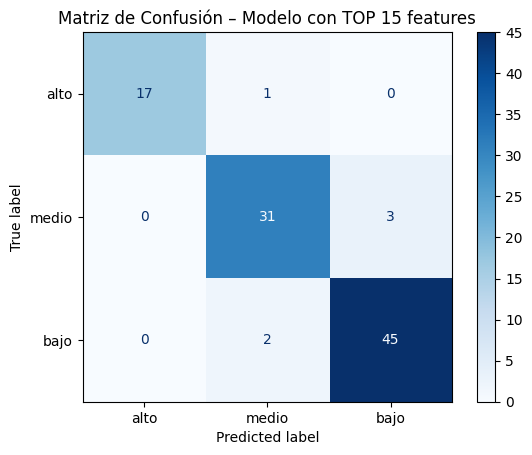

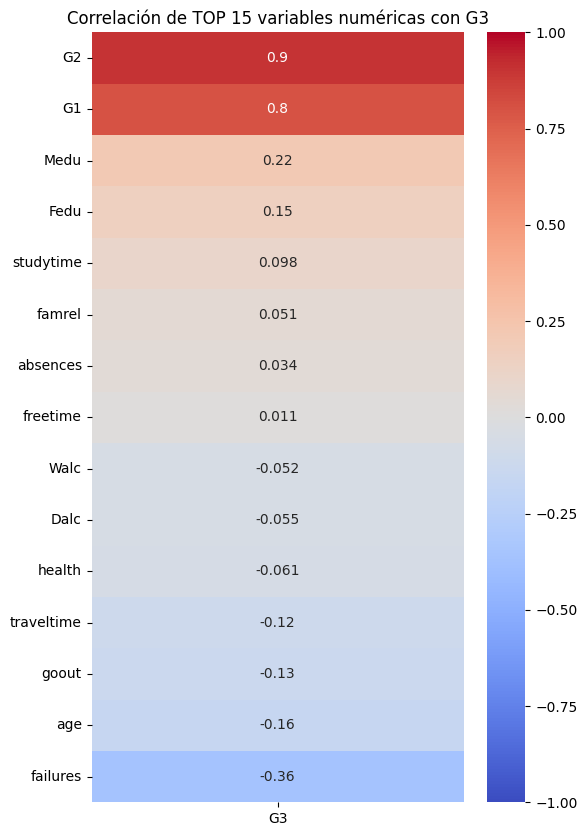

In [44]:
# MODELO 2 – Clasificación con features seleccionadas por mayor correlación con G3
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cargar dataset
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student-mat.csv", sep=";")
df.columns = df.columns.str.strip()

# Crear variable categórica de desempeño
def categorize_g3(score):
    if score <= 10:
        return 'bajo'
    elif score <= 14:
        return 'medio'
    else:
        return 'alto'

df["Desempeño"] = df["G3"].apply(categorize_g3)

# Selección automática: Top 10 features más correlacionadas con G3 =====> PROBAR CON 10 O 15 (pero 15 dio mejores resultados)
correlation_matrix = df.corr(numeric_only=True)
top_corr_features = correlation_matrix['G3'].drop('G3').abs().sort_values(ascending=False).head(15).index.tolist()

X = pd.get_dummies(df[top_corr_features], drop_first=True)
y = df['Desempeño']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Resultados
print("Reporte del modelo con TOP 15 features más correlacionadas con G3:")
print(classification_report(y_test, y_pred))

# GRAFICAR RESULTADOS--------------

# Grafico de matriz de confusion para cada categoria
cm = confusion_matrix(y_test, y_pred, labels=['alto', 'medio', 'bajo'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['alto', 'medio', 'bajo'])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión – Modelo con TOP 15 features")
plt.show()

# Grafico de top 15 features -----------
# Obtener las 15 variables más correlacionadas (positiva o negativa)
top_corr = correlation_matrix['G3'].drop('G3').sort_values(key=lambda x: abs(x), ascending=False).head(15)

# Ordenarlas por el valor real (de mayor a menor correlación)
top_corr_sorted = top_corr.sort_values(ascending=False)

# Crear heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(
    top_corr_sorted.to_frame(name='G3'),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title("Correlación de TOP 15 variables numéricas con G3")
plt.show()


## Integracion Ontologica y razonamiento automatico

✔️ Ontología convertida a OWL: /Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student_ontology2.owl


* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/httpclient-4.2.3.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/aterm-java-1.6.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-iri-0.9.5.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/Users/danie


 Reporte de clasificación ontológica:

              precision  recall  f1-score  support
alto              1.000   0.944     0.971   18.000
bajo              0.920   0.979     0.948   47.000
medio             0.938   0.882     0.909   34.000
accuracy          0.939   0.939     0.939    0.939
macro avg         0.952   0.935     0.943   99.000
weighted avg      0.941   0.939     0.939   99.000


<Figure size 600x600 with 0 Axes>

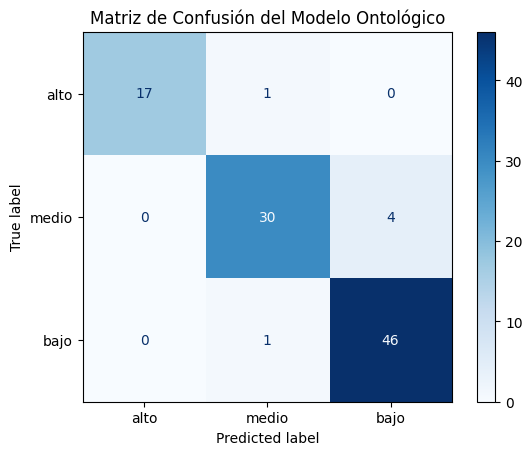

In [50]:
# Paso 1: Librerías
import pandas as pd
import rdflib
from owlready2 import get_ontology, sync_reasoner_pellet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# Paso 2: Paths
csv_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student-mat.csv"
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student_ontology2.ttl"
owl_path = ttl_path.replace(".ttl", ".owl")

# Paso 3: Convertir TTL a OWL para Owlready2
g = rdflib.Graph()
g.parse(ttl_path, format="turtle")
g.serialize(destination=owl_path, format="xml")
print(f"✔️ Ontología convertida a OWL: {owl_path}")

# Paso 4: Cargar ontología
onto = get_ontology(f"file://{owl_path}").load()
with onto:
    sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True)

# Paso 5: Cargar y preparar dataset
df = pd.read_csv(csv_path, sep=";")
df.columns = df.columns.str.strip()

# Paso 6: Variable objetivo (clasificación por rendimiento)
def categorize_g3(score):
    if score <= 10:
        return 'bajo'
    elif score <= 14:
        return 'medio'
    else:
        return 'alto'

df["Desempeño"] = df["G3"].apply(categorize_g3)

# Paso 7: Mapeo semántico (agrupación por propiedades OWL)
semantic_mapping = {
    "hasPerformance": ['G1', 'G2', 'failures'],
    "hasStudyHabits": ['studytime', 'schoolsup', 'famsup', 'paid'],
    "hasHealthProfile": ['health', 'absences', 'Dalc', 'Walc'],
    "hasSocialBehaviour": ['goout', 'romantic', 'freetime', 'famrel'],
    "accesses": ['internet', 'traveltime'],
    "belongsTo": ['famsize', 'Pstatus'],
    "hasGuardian": ['guardian', 'Mjob', 'Fjob', 'Medu', 'Fedu'],
    "attendsSchool": ['school'],
    "hasReason": ['reason'],
    "Demographics": ['age', 'sex', 'address']
}

# Paso 8: Selección de propiedades semánticas
selected_groups = ["hasPerformance", "hasStudyHabits", "hasHealthProfile", "hasSocialBehaviour"]
selected_columns = sorted(set([col for group in selected_groups for col in semantic_mapping[group]]))

# Paso 9: Preprocesamiento (dummies + target)
df_semantic = df[columns_for_model + ['Desempeño']]
df_encoded = pd.get_dummies(df_semantic.drop(columns='Desempeño'), drop_first=True)
X = df_encoded
y = df['Desempeño']


# Paso 10: División y selección de variables (0.25 test y 0.75 train por default)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

# Paso 11: Clasificador
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)

# Paso 12: Evaluación
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n Reporte de clasificación ontológica:\n")
print(report_df.round(3))

#  ------- Visualizar resultados a traves de matriz de confusion -------
# Matriz de confusión con etiquetas ordenadas
cm = confusion_matrix(y_test, y_pred, labels=['alto', 'medio', 'bajo'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['alto', 'medio', 'bajo'])

# Graficar
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión del Modelo Ontológico")
plt.show()

# CASO 3: DETECCION DE ANOMALIAS EN RENDIMIENTO EDUCATIVO

## Modelos Base

Fitting 1 folds for each of 18 candidates, totalling 18 fits
 Mejor configuración: {'contamination': 0.15, 'max_samples': 'auto', 'n_estimators': 150, 'random_state': 42}

 Classification Report (tuned):
              precision    recall  f1-score   support

          -1       0.25      0.94      0.39        16
           1       1.00      0.88      0.94       379

    accuracy                           0.88       395
   macro avg       0.62      0.91      0.67       395
weighted avg       0.97      0.88      0.91       395

 AUC: 0.9093832453825857


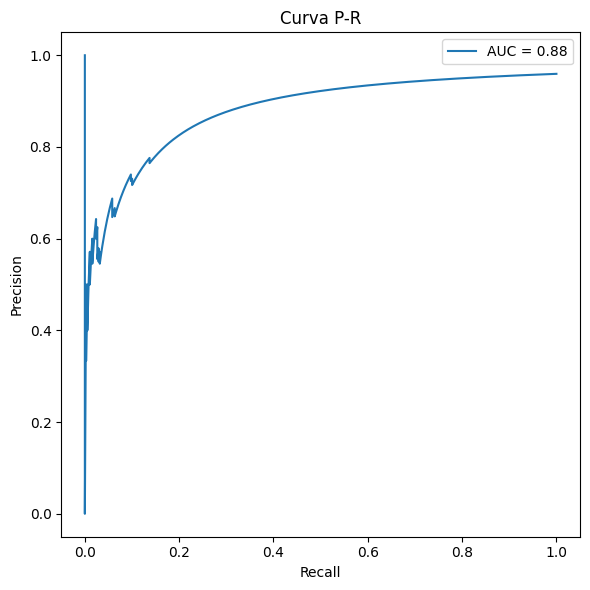

In [35]:
#  MODELO 1 – Baseline: Clasificación por desempeño con features manuales + FINE TUNING (Grid Search)

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
import numpy as np

# Etiqueta binaria: anomalías si 'failures' > 2
df["target"] = df["failures"].apply(lambda x: -1 if x > 2 else 1)

# Manualmente seleccionadas
manual_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X_manual = df[manual_features]
X_scaled = StandardScaler().fit_transform(X_manual)
y_true = df["target"]

# Custom scorer que penaliza falsos negativos (usamos recall negativo)
def recall_anomaly(y_true, y_pred):
    from sklearn.metrics import recall_score
    return recall_score(y_true == -1, y_pred == -1)

# Grid search para Isolation Forest
params = {
    "n_estimators": [100, 150, 200],
    "max_samples": ["auto", 0.8],
    "contamination": [0.05, 0.1, 0.15],
    "random_state": [42]
}

# Uso un wrapper para sklearn para permitir scoring personalizado 
class IsolationForestWrapper(IsolationForest):
    def fit(self, X, y=None):
        return super().fit(X)
    def predict(self, X):
        return super().predict(X)

grid = GridSearchCV(
    IsolationForestWrapper(),
    param_grid=params,
    scoring=make_scorer(recall_anomaly, greater_is_better=True),
    cv=[(np.arange(len(X_scaled)), np.arange(len(X_scaled)))],  # No split
    verbose=1
)

grid.fit(X_scaled, y_true)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_scaled)

# Resultados
print(" Mejor configuración:", grid.best_params_)
print("\n Classification Report (tuned):")
print(classification_report(y_true, y_pred))
print(" AUC:", roc_auc_score(y_true, y_pred))

# Visualizacion de metricas: ------------------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Convertir las etiquetas a binario (1 = normal, 0 = anomalía)
y_true_bin = np.where(y_true == -1, 0, 1)
y_pred_bin = np.where(y_pred == -1, 0, 1)

# Probabilidad aproximada para ROC y PR (en Isolation Forest se puede usar decision_function)
scores = best_model.decision_function(X_scaled) * -1  # invertir: menor = más anómalo

# Visualizar resultado con curva de Precision-Recall
precision, recall, _ = precision_recall_curve(y_true_bin, scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva P-R')
plt.legend()

plt.tight_layout()
plt.show()


Fitting 1 folds for each of 18 candidates, totalling 18 fits
Evaluación en test set real:
Mejor configuración: {'contamination': 0.1, 'max_samples': 0.8, 'n_estimators': 200, 'random_state': 42}
              precision    recall  f1-score   support

          -1       0.22      0.67      0.33         3
           1       0.99      0.91      0.95        76

    accuracy                           0.90        79
   macro avg       0.60      0.79      0.64        79
weighted avg       0.96      0.90      0.92        79

AUC: 0.787280701754386


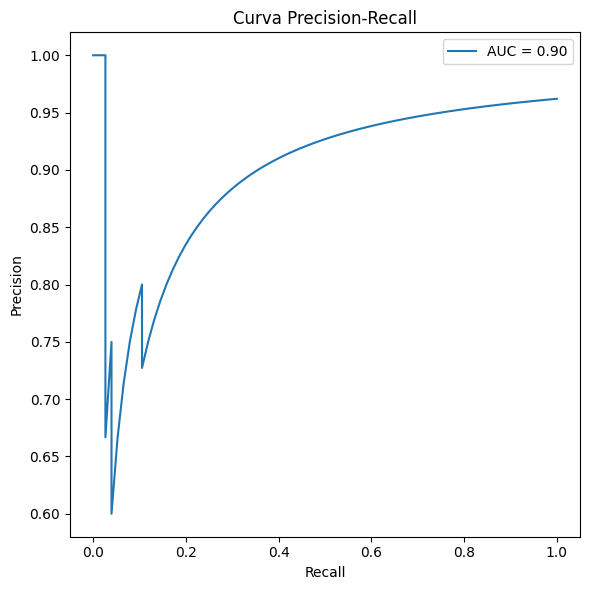

In [6]:
# MODELO 2 - Modelo de Correlacion con target y Grid Search
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Paso 1: Cargar dataset
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student-mat.csv", sep=";")
df.columns = df.columns.str.strip()

# Paso 2: Etiqueta binaria: anomalías si 'failures' > 2
df["target"] = df["failures"].apply(lambda x: -1 if x > 2 else 1)

# Paso 3: Selección por correlación (top 10 numéricas más correlacionadas con 'target')
correlation_with_target = df.select_dtypes(include=[np.number]).corr()["target"].abs().sort_values(ascending=False)
top_features = correlation_with_target.drop("target").head(10).index.tolist()  # se excluye 'target' del top

# Paso 4: Dividir en conjunto de entrenamiento y test real
X = df[top_features]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Scorer personalizado (recall de anomalías)
def recall_anomaly(y_true, y_pred):
    from sklearn.metrics import recall_score
    return recall_score(y_true == -1, y_pred == -1)

class IsolationForestWrapper(IsolationForest):
    def fit(self, X, y=None):
        return super().fit(X)
    def predict(self, X):
        return super().predict(X)

# Paso 6: Grid Search en conjunto de entrenamiento solamente
params = {
    "n_estimators": [100, 150, 200],
    "max_samples": ["auto", 0.8],
    "contamination": [0.05, 0.1, 0.15],
    "random_state": [42]
}

grid = GridSearchCV(
    IsolationForestWrapper(),
    param_grid=params,
    scoring=make_scorer(recall_anomaly, greater_is_better=True),
    cv=[(np.arange(len(X_train_scaled)), np.arange(len(X_train_scaled)))],  # validación sobre el mismo train
    verbose=1
)

grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

# Paso 7: Evaluación en conjunto de test real
y_pred_test = best_model.predict(X_test_scaled)
print("Evaluación en test set real:")
print("Mejor configuración:", grid.best_params_)
print(classification_report(y_test, y_pred_test))
print("AUC:", roc_auc_score(y_test, y_pred_test))

# Paso 8: Curva Precision-Recall (en test set)
y_test_bin = np.where(y_test == -1, 0, 1)
scores = best_model.decision_function(X_test_scaled) * -1  # más negativo = más anómalo
precision, recall, _ = precision_recall_curve(y_test_bin, scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall') # - test set
plt.legend()
plt.tight_layout()
plt.show()

## Integracion Ontologica

✔️ Ontología convertida a OWL: /Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student_ontology2.owl


* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/httpclient-4.2.3.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/aterm-java-1.6.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-iri-0.9.5.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/Users/danie


 Resultados del modelo ontológico (Test real):
              precision    recall  f1-score   support

          -1       0.14      0.33      0.20         3
           1       0.97      0.92      0.95        76

    accuracy                           0.90        79
   macro avg       0.56      0.63      0.57        79
weighted avg       0.94      0.90      0.92        79

AUC: 0.6271929824561404


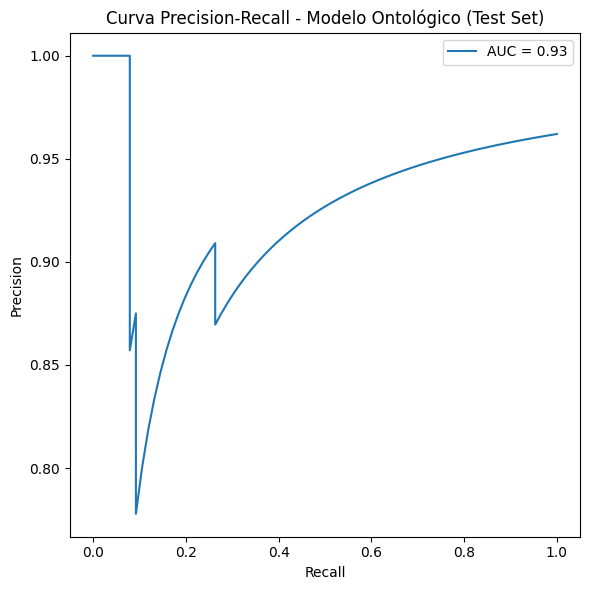

In [15]:
# Paso 1: Librerías
import pandas as pd
import rdflib
from owlready2 import get_ontology, sync_reasoner_pellet
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Paths
csv_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student-mat.csv"
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/ENTREGABLES/ENTREGABLE2/AVANCE2_PRUEBAS/student_ontology2.ttl"
owl_path = ttl_path.replace(".ttl", ".owl")

# Paso 3: Convertir TTL a OWL
g = rdflib.Graph()
g.parse(ttl_path, format="turtle")
g.serialize(destination=owl_path, format="xml")
print(f"✔️ Ontología convertida a OWL: {owl_path}")

# Paso 4: Cargar ontología
onto = get_ontology(f"file://{owl_path}").load()
with onto:
    sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True)

# Paso 5: Dataset y target
df = pd.read_csv(csv_path, sep=";")
df.columns = df.columns.str.strip()
df["target"] = df["failures"].apply(lambda x: -1 if x > 2 else 1)

# Paso 6: Mapeo semántico
semantic_mapping = {
    "hasPerformance": ['G1', 'G2', 'failures'],
    "hasStudyHabits": ['studytime', 'schoolsup', 'famsup', 'paid'],
    "hasHealthProfile": ['health', 'absences', 'Dalc', 'Walc'],
    "hasSocialBehaviour": ['goout', 'romantic', 'freetime', 'famrel']
}
selected_columns = sorted(set([col for group in semantic_mapping.values() for col in group]))

# Paso 7: Preprocesamiento + dummies
df_semantic = df[selected_columns + ['target']]
df_encoded = pd.get_dummies(df_semantic.drop(columns='target'), drop_first=True)
X = df_encoded
y = df["target"]

# Paso 8: División Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 9: Modelo Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_scaled)
y_pred = model.predict(X_test_scaled)

# Paso 10: Evaluación
print("\n Resultados del modelo ontológico (Test real):")
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

# Paso 11: Curva Precision-Recall
y_test_bin = np.where(y_test == -1, 0, 1)
scores = model.decision_function(X_test_scaled) * -1
precision, recall, _ = precision_recall_curve(y_test_bin, scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Modelo Ontológico (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()